In [36]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm
import matplotlib
import scipy.stats as st
from scipy.stats import linregress
import seaborn as sns; sns.set();
from sklearn import datasets

## Read CSV

In [3]:
licenses = "Resources/business-licenses.csv"
owners = "Resources/business-owners.csv"

In [4]:
license_df = pd.read_csv(licenses)
license_df.head()

C:\Users\Lance\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ID,LICENSE ID,ACCOUNT NUMBER,SITE NUMBER,LEGAL NAME,DOING BUSINESS AS NAME,ADDRESS,CITY,STATE,ZIP CODE,...,LICENSE STATUS CHANGE DATE,SSA,LATITUDE,LONGITUDE,LOCATION,Community Areas,Historical Wards 2003-2015,Zip Codes,Census Tracts,Wards
0,101-20040516,1480073,1,1,BERGHOFF RESTAURANT COMPANY OF DELAWARE,BERGHOFF'S RESTAURANT,17 W ADAMS ST # 1ST,CHICAGO,IL,60603,...,NaN,1.0,41.879342,-87.628412,"{'latitude': '41.879341938770445', 'longitude'...",38.0,22.0,14912.0,92.0,36.0
1,101-20021116,1278029,1,1,BERGHOFF RESTAURANT COMPANY OF DELAWARE,BERGHOFF'S RESTAURANT,17 W ADAMS ST # 1ST,CHICAGO,IL,60603,...,NaN,1.0,41.879342,-87.628412,"{'latitude': '41.879341938770445', 'longitude'...",38.0,22.0,14912.0,92.0,36.0
2,101-20030516,1337924,1,1,BERGHOFF RESTAURANT COMPANY OF DELAWARE,BERGHOFF'S RESTAURANT,17 W ADAMS ST # 1ST,CHICAGO,IL,60603,...,NaN,1.0,41.879342,-87.628412,"{'latitude': '41.879341938770445', 'longitude'...",38.0,22.0,14912.0,92.0,36.0
3,100-20040516,1480076,1,1,BERGHOFF RESTAURANT COMPANY OF DELAWARE,BERGHOFF'S RESTAURANT,17 W ADAMS ST # 1ST,CHICAGO,IL,60603,...,NaN,1.0,41.879342,-87.628412,"{'latitude': '41.879341938770445', 'longitude'...",38.0,22.0,14912.0,92.0,36.0
4,101-20031116,1404362,1,1,BERGHOFF RESTAURANT COMPANY OF DELAWARE,BERGHOFF'S RESTAURANT,17 W ADAMS ST # 1ST,CHICAGO,IL,60603,...,NaN,1.0,41.879342,-87.628412,"{'latitude': '41.879341938770445', 'longitude'...",38.0,22.0,14912.0,92.0,36.0


### Business License and Activities

In [5]:
license_df.columns

Index(['ID', 'LICENSE ID', 'ACCOUNT NUMBER', 'SITE NUMBER', 'LEGAL NAME',
       'DOING BUSINESS AS NAME', 'ADDRESS', 'CITY', 'STATE', 'ZIP CODE',
       'WARD', 'PRECINCT', 'WARD PRECINCT', 'POLICE DISTRICT', 'LICENSE CODE',
       'LICENSE DESCRIPTION', 'BUSINESS ACTIVITY ID', 'BUSINESS ACTIVITY',
       'LICENSE NUMBER', 'APPLICATION TYPE', 'APPLICATION CREATED DATE',
       'APPLICATION REQUIREMENTS COMPLETE', 'PAYMENT DATE',
       'CONDITIONAL APPROVAL', 'LICENSE TERM START DATE',
       'LICENSE TERM EXPIRATION DATE', 'LICENSE APPROVED FOR ISSUANCE',
       'DATE ISSUED', 'LICENSE STATUS', 'LICENSE STATUS CHANGE DATE', 'SSA',
       'LATITUDE', 'LONGITUDE', 'LOCATION', 'Community Areas',
       'Historical Wards 2003-2015', 'Zip Codes', 'Census Tracts', 'Wards'],
      dtype='object')

### License Description Distribution

In [134]:
license_description = license_df["LICENSE DESCRIPTION"].value_counts().head(17)
license_description

Limited Business License                         417758
Retail Food Establishment                        147916
Tobacco                                           44865
Regulated Business License                        43334
Consumption on Premises - Incidental Activity     31327
Home Occupation                                   27147
Home Repair                                       26140
Tavern                                            17107
Package Goods                                     15089
Manufacturing Establishments                      12573
Special Event Food                                12163
Hazardous Materials                               10959
Motor Vehicle Repair : Engine Only (Class II)     10037
Wholesale Food Establishment                       9461
Peddler License                                    8890
Peddler, non-food                                  8552
Motor Vehicle Services License                     8225
Name: LICENSE DESCRIPTION, dtype: int64

In [158]:
licenses_activity =license_df.loc[license_df['LICENSE DESCRIPTION'] == 'Limited Business License']
licenses_activity["BUSINESS ACTIVITY"].value_counts().head(10)

Hair Services                                                  6051
Miscellaneous Commercial Services                              5541
Retail Sales of Clothing / Accessories / Shoes                 3707
Retail Sales of General Merchandise                            3479
Administrative Commercial Office                               3322
Tax Preparation Services                                       2216
Nail Services                                                  1899
Dry Cleaning - Drop Off Location                               1603
Retail Sales of General Merchandise and Non-Perishable Food    1472
Retail Sales of Cell Phones and Accessories                    1058
Name: BUSINESS ACTIVITY, dtype: int64

In [156]:
licenses_top2 =license_df.loc[license_df['LICENSE DESCRIPTION'] == 'Retail Food Establishment']
licenses_top2["BUSINESS ACTIVITY"].value_counts().head(5)

Retail Sales of Perishable Foods                                                                  128883
Preparation of Food and Dining on Premise With Seating                                              6108
Sale of Food Prepared Onsite With Dining Area                                                       3324
Sale of Food Prepared Onsite Without Dining Area                                                    1939
Retail Sales of General Merchandise and Non-Perishable Food | Retail Sales of Perishable Foods       664
Name: BUSINESS ACTIVITY, dtype: int64

In [159]:
licenses_top3 =license_df.loc[license_df['LICENSE DESCRIPTION'] == 'Tobacco']
licenses_top3["BUSINESS ACTIVITY"].value_counts().head(5)

Retail Sale of Tobacco                                                                         40697
Retail Sales of Tobacco Products                                                                1135
Retail Sales of Tobacco and Flavored Tobacco Products                                            416
Retail Sales of Tobacco and Flavored Tobacco Products | Retail Sales of Tobacco Accessories      122
Retail Sales of Tobacco Accessories | Retail Sales of Tobacco and Flavored Tobacco Products      114
Name: BUSINESS ACTIVITY, dtype: int64

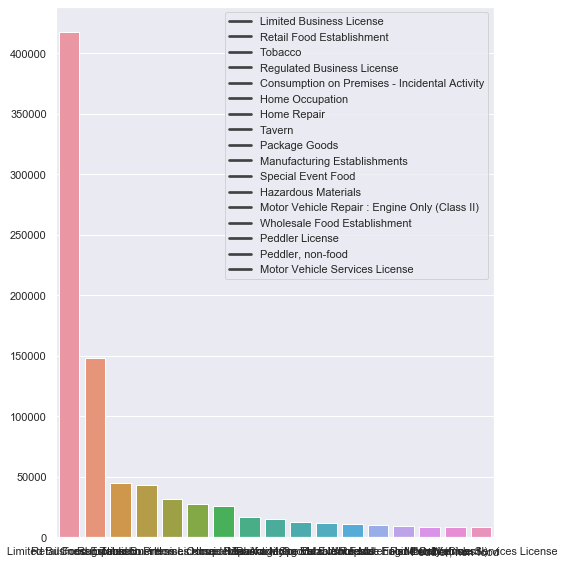

In [145]:
a = license_description.index
b = license_description.values
fig, ax = plt.subplots(figsize=(8, 8))
sns.set(style="darkgrid",font_scale=1)
sns.barplot(x=a, y=b)
plt.legend(labels=a, loc="best")
plt.tight_layout()
plt.show()

### Business Activities Distribution

In [67]:
activities = license_df["BUSINESS ACTIVITY"].value_counts().head(17)
activities

Retail Sales of Perishable Foods                                             128883
Retail Sale of Tobacco                                                        40697
Consumption of Liquor on Premises                                             30713
Tavern - Consumption of Liquor on Premise                                     16837
Retail Sales of Packaged Liquor                                               14172
Special Event Food                                                             8838
Wholesale Food Sales                                                           8801
Home Repair Services                                                           8050
Other Home Occupations                                                         7646
Not-For-Profit Selling Raffles for Prizes of $50 or More                       6854
Provide Parking Spaces For a Fee - Available and Advertised to the Public      6480
Preparation of Food and Dining on Premise With Seating                      

In [101]:
# find the sum of other activities less than 5000
other = license_df["BUSINESS ACTIVITY"].value_counts()[17:].sum()
other

145736

In [104]:
others = pd.Series([other],index=["Others less than 5000"])
others

Others less than 5000    145736
dtype: int64

In [105]:
top17= activities.append(others)
top17

Retail Sales of Perishable Foods                                             128883
Retail Sale of Tobacco                                                        40697
Consumption of Liquor on Premises                                             30713
Tavern - Consumption of Liquor on Premise                                     16837
Retail Sales of Packaged Liquor                                               14172
Special Event Food                                                             8838
Wholesale Food Sales                                                           8801
Home Repair Services                                                           8050
Other Home Occupations                                                         7646
Not-For-Profit Selling Raffles for Prizes of $50 or More                       6854
Provide Parking Spaces For a Fee - Available and Advertised to the Public      6480
Preparation of Food and Dining on Premise With Seating                      

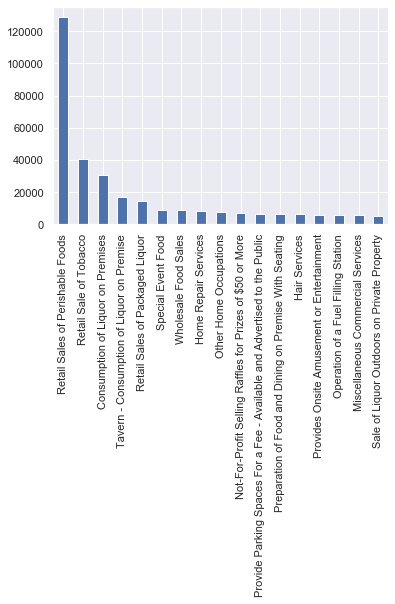

In [107]:
activities.plot.bar()

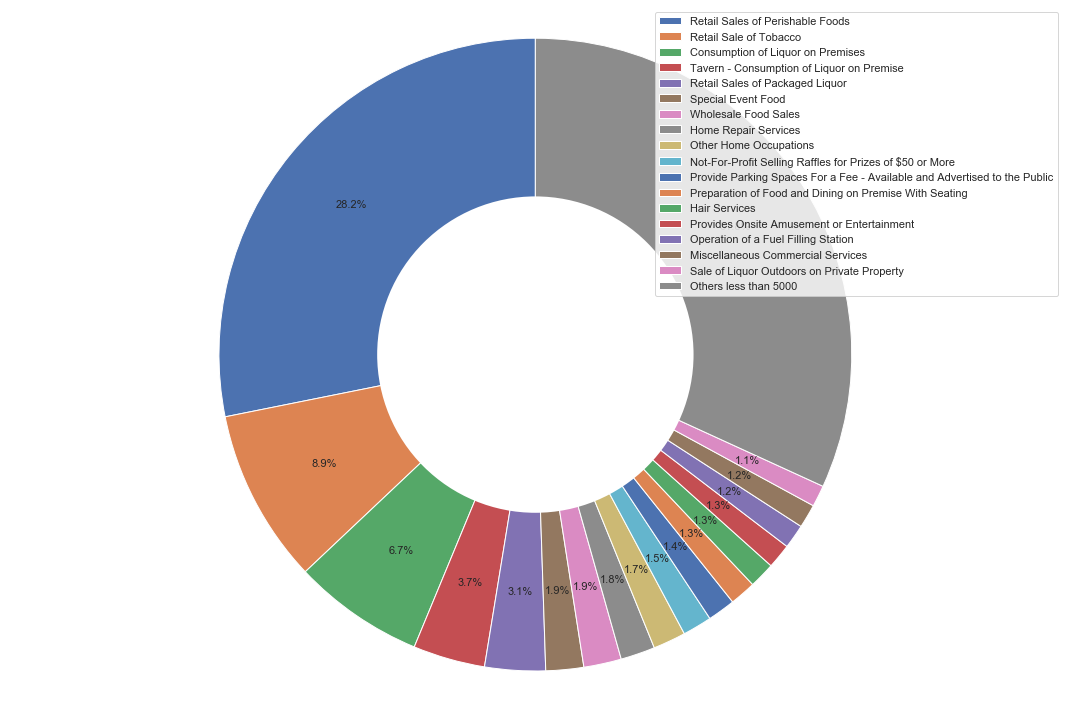

In [112]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = top17.index
data = top17
matplotlib.rcParams['font.size'] = 11
fig, ax = plt.subplots(figsize=(15, 10))
ax.pie(data,  autopct='%1.1f%%', startangle=90, pctdistance=0.75)
plt.legend(labels, loc="best")
#draw the middle circle
centre_circle = plt.Circle((0,0),0.5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()

### License start date (application created date)

In [211]:
license_start = license_df.groupby([license_df["APPLICATION CREATED DATE"]]).count()
license_start

,ID,LICENSE ID,ACCOUNT NUMBER,SITE NUMBER,LEGAL NAME,DOING BUSINESS AS NAME,ADDRESS,CITY,STATE,ZIP CODE,...,LICENSE STATUS CHANGE DATE,SSA,LATITUDE,LONGITUDE,LOCATION,Community Areas,Historical Wards 2003-2015,Zip Codes,Census Tracts,Wards
APPLICATION CREATED DATE,,,,,,,,,,,,,,,,,,,,,
2000-06-19,1,1,1,1,1,1,1,1,1,1,...,0,0,1,1,1,1,1,1,1,1
2000-06-22,2,2,2,2,2,2,2,2,2,2,...,0,1,2,2,2,2,2,2,2,2
2000-06-23,1,1,1,1,1,1,1,1,1,1,...,0,0,1,1,1,1,1,1,1,1
2000-06-28,1,1,1,1,1,1,1,1,1,1,...,0,0,1,1,1,1,1,1,1,1
2000-06-29,2,2,2,2,2,2,2,2,2,2,...,0,1,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-11-29,7,7,7,7,7,7,7,7,7,7,...,0,1,7,7,7,7,7,7,7,7
2019-12-02,9,9,9,9,9,9,9,9,9,9,...,0,0,8,8,8,8,8,8,8,8
2019-12-03,9,9,9,9,9,9,9,9,9,9,...,0,0,5,5,5,5,5,5,5,5


In [228]:
new_license_start = license_start[["ID"]].copy()
new_license_start

,ID
APPLICATION CREATED DATE,
2000-06-19,1
2000-06-22,2
2000-06-23,1
2000-06-28,1
2000-06-29,2
...,...
2019-11-29,7
2019-12-02,9
2019-12-03,9


In [230]:
license_df["APPLICATION CREATED DATE"].value_counts().head(10)

2002-03-27    10043
2003-03-25     9639
2002-09-24     5443
2000-12-18      863
2000-10-06      483
2001-10-03      477
2000-07-06      357
2016-04-28      182
2016-04-27      175
2006-04-05      158
Name: APPLICATION CREATED DATE, dtype: int64

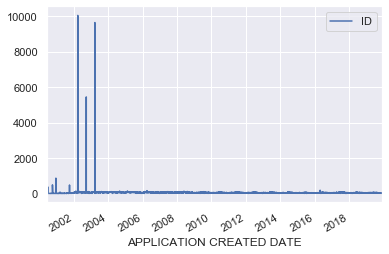

In [216]:
new_license_start.plot()

In [217]:
license_sum = new_license_start.cumsum()

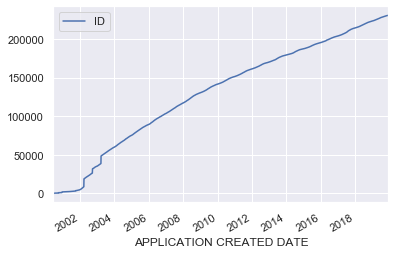

In [218]:
license_sum.plot()

In [181]:
license_df.groupby([license_df["APPLICATION CREATED DATE"].dt.year, license_df["APPLICATION CREATED DATE"].dt.month]).count()

ID  LICENSE ID  \
APPLICATION CREATED DATE APPLICATION CREATED DATE                    
2000.0                   6.0                         8           8   
                         7.0                       383         383   
                         8.0                        50          50   
                         9.0                        43          43   
                         10.0                      519         519   
...                                                ...         ...   
2019.0                   8.0                       665         665   
                         9.0                       581         581   
                         10.0                      520         520   
                         11.0                      368         368   
                         12.0                       34          34   

                                                   ACCOUNT NUMBER  \
APPLICATION CREATED DATE APPLICATION CREATED DATE                   
2000.0                   6.0                                    8   
                         7.0                                  383   
                         8.0                                   50   
                         9.0                                   43   
                         10.0                                 519   
...                                                           ...   
2019.0                   8.0                                  665   
                         9.0                                  581   
                         10.0                                 520   
                         11.0                                 368   
                         12.0                                  34   

                                                   SITE NUMBER  LEGAL NAME  \
APPLICATION CREATED DATE APPLICATION CREATED DATE                            
2000.0                   6.0                                 8           8   
                         7.0                               383         383   
                         8.0                                50          50   
                         9.0                                43          43   
                         10.0                              519         519   
...                                                        ...         ...   
2019.0                   8.0                               665         665   
                         9.0                               581         581   
                         10.0                              520         520   
                         11.0                              368         368   
                         12.0                               34          34   

                                                   DOING BUSINESS AS NAME  \
APPLICATION CREATED DATE APPLICATION CREATED DATE                           
2000.0                   6.0                                            8   
                         7.0                                          383   
                         8.0                                           50   
                         9.0                                           43   
                         10.0                                         519   
...                                                                   ...   
2019.0                   8.0                                          664   
                         9.0                                          581   
                         10.0                                         520   
                         11.0                                         367   
                         12.0                                          34   

                                                   ADDRESS  CITY  STATE  \
APPLICATION CREATED DATE APPLICATION CREATED DATE                         
2000.0                   6.0                             8     8      8   
 